In [1]:
%%markdown
## Assignment5
### -- Yuanjie Yue

## Assignment5
### -- Yuanjie Yue


In [2]:
# preparation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%markdown
# 1. Regression

# 1. Regression


In [4]:
import pandas as pd 
df_BJ = pd.read_csv("./Beijing.csv")
df_SH = pd.read_csv("./Shanghai.csv")
df_GZ = pd.read_csv("./Guangzhou.csv")
df_CD = pd.read_csv("./Chengdu.csv")
df_SY = pd.read_csv("./Shenyang.csv")
df_BJ['city'] = 'Beijing'
df_SH['city'] = 'Shanghai'
df_GZ['city'] = 'Guangzhou'
df_CD['city'] = 'Chengdu'
df_SY['city'] = 'Shenyang'
df = pd.concat([df_BJ, df_SH, df_GZ, df_CD, df_SY])

In [5]:
df.head()

,year,month,day,hour,season,PM,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,city
0,2010,1,1,0,4.0,NaN,-21.0,43.0,1021.0,-11.0,1.79,0.0,0.0,Beijing
1,2010,1,1,1,4.0,NaN,-21.0,47.0,1020.0,-12.0,4.92,0.0,0.0,Beijing
2,2010,1,1,2,4.0,NaN,-21.0,43.0,1019.0,-11.0,6.71,0.0,0.0,Beijing
3,2010,1,1,3,4.0,NaN,-21.0,55.0,1019.0,-14.0,9.84,0.0,0.0,Beijing
4,2010,1,1,4,4.0,NaN,-20.0,51.0,1018.0,-12.0,12.97,0.0,0.0,Beijing


In [6]:
df.groupby('city').size()

city
Beijing      52584
Chengdu      52584
Guangzhou    52584
Shanghai     52584
Shenyang     52584
dtype: int64

In [7]:
%%markdown
## 1.1 Answer the following questions

## 1.1 Answer the following questions


In [8]:
# 1. Which of the 5 cities has the largest temperature range 
#    (e.g., highest temperature lowest temperature) during the period the dataset was collected?

In [9]:
temp_range_by_city = df.groupby('city')['TEMP'].max() - df.groupby('city')['TEMP'].min()
temp_range_by_city

city
Beijing      61.000000
Chengdu      41.000000
Guangzhou    35.700002
Shanghai     46.000000
Shenyang     63.000000
Name: TEMP, dtype: float64

In [10]:
print('Shenyang get the largest temp range', temp_range_by_city['Shenyang'])

Shenyang get the largest temp range 63.0


In [11]:
# 2. Which cities would you consider to be the most and least polluted? 
#    Explain the logic for your answer in detail.

In [12]:
mean_pm_by_city = df.dropna().groupby('city')['PM'].mean()
mean_pm_by_city

city
Beijing      95.831703
Chengdu      84.656497
Guangzhou    50.803561
Shanghai     53.411888
Shenyang     75.075592
Name: PM, dtype: float64

In [13]:
print('Beijing is most polluted city, with the highest mean PM', mean_pm_by_city['Beijing'])
print('Guangzhou is least polluted city, with the lowest mean PM', mean_pm_by_city['Guangzhou'])

Beijing is most polluted city, with the highest mean PM 95.83170293874423
Guangzhou is least polluted city, with the lowest mean PM 50.80356094092918


In [14]:
# 3. What is the average temperature for each of the four seasons in each of the cities?

In [15]:
mean_temp_by_season_by_city = df.groupby(['city', 'season'])['TEMP'].mean()
mean_temp_by_season_by_city

city       season
Beijing    1.0       14.008455
           2.0       25.852710
           3.0       12.623598
           4.0       -2.434568
Chengdu    1.0       18.258194
           2.0       25.966364
           3.0       18.356543
           4.0        8.052331
Guangzhou  1.0       21.906167
           2.0       28.203261
           3.0       23.635798
           4.0       14.099237
Shanghai   1.0       15.982709
           2.0       27.705798
           3.0       19.765703
           4.0        6.227308
Shenyang   1.0        9.456422
           2.0       23.612061
           3.0        9.809549
           4.0       -9.199953
Name: TEMP, dtype: float64

In [16]:
#4. Where are the hottest summer and coldest winters observed? Explain how you defined hottest and coldest.

In [17]:
df_summer = df[df['season'] == 2.0]
mean_summer_temp_by_city_by_year = df_summer.groupby(['city', 'year'])['TEMP'].mean().sort_values(ascending=False)
mean_summer_temp_by_city_by_year

city       year
Shanghai   2013    29.410965
Guangzhou  2010    28.615263
           2011    28.450272
           2014    28.440580
Shanghai   2012    28.181612
Guangzhou  2015    28.177582
           2012    28.027899
Shanghai   2010    27.962862
           2011    27.613049
Guangzhou  2013    27.507971
Chengdu    2013    26.965048
Shanghai   2015    26.711504
           2014    26.355525
Beijing    2014    26.241395
Chengdu    2011    26.227211
           2015    26.121995
Beijing    2011    25.961957
           2010    25.941576
           2013    25.801178
           2015    25.701723
Chengdu    2012    25.688294
           2014    25.557518
Beijing    2012    25.468297
Chengdu    2010    25.239456
Shenyang   2013    23.935206
           2014    23.774457
           2011    23.617127
           2015    23.614583
           2010    23.545361
           2012    23.177031
Name: TEMP, dtype: float64

In [18]:
df_winter = df[df['season'] == 4.0]
mean_winter_temp_by_city_by_year = df_winter.groupby(['city', 'year'])['TEMP'].mean().sort_values()
mean_winter_temp_by_city_by_year

city       year
Shenyang   2012   -11.393315
           2011   -10.357247
           2013    -9.720370
           2010    -9.607660
           2014    -7.642130
           2015    -6.510185
Beijing    2012    -4.263736
           2010    -3.431944
           2011    -2.971759
           2013    -2.519907
           2014    -1.022222
           2015    -0.376563
Shanghai   2011     4.731481
           2012     5.177656
           2013     6.146759
           2014     6.740278
Chengdu    2011     6.748031
           2012     6.912088
Shanghai   2010     7.051972
           2015     7.529875
Chengdu    2014     8.071792
           2013     8.401852
           2010     8.891779
           2015     9.303241
Guangzhou  2011    12.780139
           2014    13.218750
           2012    13.438324
           2013    14.328333
           2015    15.158036
           2010    15.679676
Name: TEMP, dtype: float64

In [19]:
hottest_summer = mean_summer_temp_by_city_by_year.head(1)
hottest_summer

city      year
Shanghai  2013    29.410965
Name: TEMP, dtype: float64

In [20]:
coldest_winter = mean_winter_temp_by_city_by_year.head(1)
coldest_winter

city      year
Shenyang  2012   -11.393315
Name: TEMP, dtype: float64

In [21]:
%%markdown
#### Definition of Hottest and Coldest
1. I define hottest summer as the summer with highest temperature. 
2. I define coldest winter as the winter with lowest temperature.

#### Result
1. We could see the hottest summer happens in Shanghai in 2013 with a mean temp of 29.41 degree.
2. We could see the coldest winter happens in Shenyang in 2012 with a mean temp of -11.39 degree.

#### Definition of Hottest and Coldest
1. I define hottest summer as the summer with highest temperature. 
2. I define coldest winter as the winter with lowest temperature.

#### Result
1. We could see the hottest summer happens in Shanghai in 2013 with a mean temp of 29.41 degree.
2. We could see the coldest winter happens in Shenyang in 2012 with a mean temp of -11.39 degree.


In [22]:
# 4. Which feature appears to contain the largest amount of missing data overall?

In [23]:
feature_with_most_missing_data = df.isnull().sum().sort_values(ascending=False).head(1)
feature = feature_with_most_missing_data.index[0]
print(feature)
missing_num = feature_with_most_missing_data[0]

PM


In [24]:
print("the feature '", feature ,"' contains lagest amount of missing data, with a number of", missing_num)

the feature ' PM ' contains lagest amount of missing data, with a number of 95562


In [25]:
%%markdown
## 1.2 Visualizations

## 1.2 Visualizations


In [26]:
df.set_index(pd.to_datetime(df[['year','month','day','hour']]), inplace=True)

In [27]:
df.dropna(inplace=True)

In [28]:
df.head()

,year,month,day,hour,season,PM,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,city
2010-01-01 23:00:00,2010,1,1,23,4.0,129.0,-17.0,41.0,1020.0,-5.0,0.89,0.0,0.0,Beijing
2010-01-02 00:00:00,2010,1,2,0,4.0,148.0,-16.0,38.0,1020.0,-4.0,1.79,0.0,0.0,Beijing
2010-01-02 01:00:00,2010,1,2,1,4.0,159.0,-15.0,42.0,1020.0,-4.0,2.68,0.0,0.0,Beijing
2010-01-02 02:00:00,2010,1,2,2,4.0,181.0,-11.0,63.5,1021.0,-5.0,3.57,0.0,0.0,Beijing
2010-01-02 03:00:00,2010,1,2,3,4.0,138.0,-7.0,85.0,1022.0,-5.0,5.36,0.0,0.0,Beijing


In [29]:
# 1. Using your library of choice, generate a line chart showing the temperate (y-axis) and dates 
#    (x-axis) for one of the five cities. Is there a noticeable seasonal pattern?

In [30]:
df_Beijing = df[df['city'] == 'Beijing']

/Users/yueyuanj/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


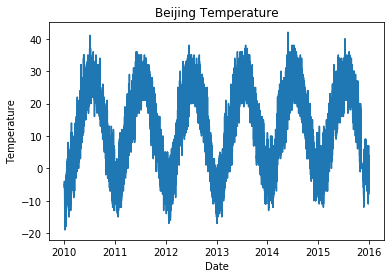

In [31]:
plt.plot(df_Beijing.index, df_Beijing['TEMP'])
plt.title('Beijing Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [32]:
%%markdown 
1. Yes, there is a noticable seasonal pattern, that the plot looks like a wave, peaks appear in the middle of the
years, while vallies appear in the head and rear of the years.

1. Yes, there is a noticable seasonal pattern, that the plot looks like a wave, peaks appear in the middle of the
years, while vallies appear in the head and rear of the years.


In [33]:
# 2. Create a boxplot showing the temperature values aggregated by month for one of the five cities.

In [34]:
# by year then by month
df_Beijing_group_by_year_by_month = df_Beijing.groupby(['year','month']).agg('mean')['TEMP']
df_Beijing_group_by_year_by_month.head()

year  month
2010  1        -6.371560
      2        -1.915052
      3         2.997179
      4        10.807799
      5        20.853460
Name: TEMP, dtype: float64

In [35]:
df_Beijing_group_by_year_by_month[2010].head()

month
1    -6.371560
2    -1.915052
3     2.997179
4    10.807799
5    20.853460
Name: TEMP, dtype: float64

In [36]:
df_Beijing_monthly_temp = [df_Beijing_group_by_year_by_month[2010],
                          df_Beijing_group_by_year_by_month[2011],
                           df_Beijing_group_by_year_by_month[2012],
                          df_Beijing_group_by_year_by_month[2013],
                          df_Beijing_group_by_year_by_month[2014],
                          df_Beijing_group_by_year_by_month[2015]]

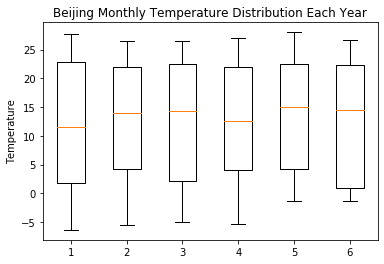

In [37]:
plt.boxplot(df_Beijing_monthly_temp)
plt.title('Beijing Monthly Temperature Distribution Each Year')
plt.ylabel('Temperature')
plt.show()

In [38]:
## just by month
df_Beijing_groupby_month = df_Beijing.groupby('month').agg('mean')['TEMP']

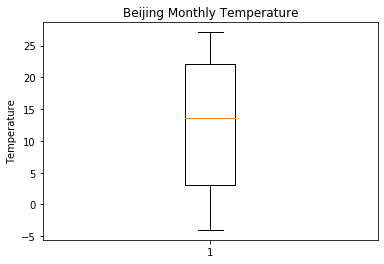

In [39]:
plt.boxplot(df_Beijing_groupby_month)
plt.title('Beijing Monthly Temperature')
plt.ylabel('Temperature')
plt.show()

In [40]:
# 3. Create a scatter plot using two features of your choice. Choose a pair of features that you believe have 
#    some correlation between them. Based on your visualization, do they seem to be correlated?

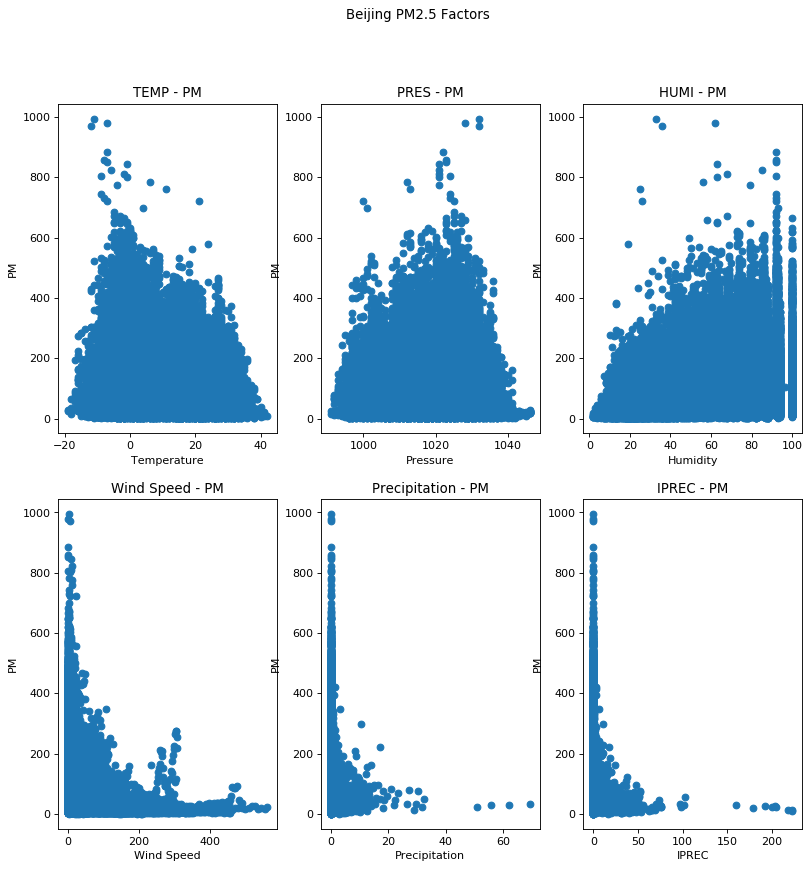

In [41]:
# # dig up the relationship between PM and other features
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(231)
plt.scatter(df_Beijing['TEMP'], df_Beijing['PM'])
plt.title('TEMP - PM')
plt.xlabel('Temperature')
plt.ylabel('PM')
plt.subplot(232)
plt.scatter(df_Beijing['PRES'], df_Beijing['PM'])
plt.title('PRES - PM')
plt.xlabel('Pressure')
plt.ylabel('PM')
plt.subplot(233)
plt.scatter(df_Beijing['HUMI'], df_Beijing['PM'])
plt.title('HUMI - PM')
plt.xlabel('Humidity')
plt.ylabel('PM')
plt.subplot(234)
plt.scatter(df_Beijing['Iws'], df_Beijing['PM'])
plt.title('Wind Speed - PM')
plt.xlabel('Wind Speed')
plt.ylabel('PM')
plt.subplot(235)
plt.scatter(df_Beijing['precipitation'], df_Beijing['PM'])
plt.title('Precipitation - PM')
plt.xlabel('Precipitation')
plt.ylabel('PM')
plt.subplot(236)
plt.scatter(df_Beijing['Iprec'], df_Beijing['PM'])
plt.title('IPREC - PM')
plt.xlabel('IPREC')
plt.ylabel('PM')
plt.suptitle('Beijing PM2.5 Factors')
plt.show()

In [42]:
%%markdown 
Base on the visualizations above, we could see that all of the features, like temperature, pressure, humidity,
wind speed and precipitation, have some relationship with PM.
1. There is a peak in the Temp - PM plot, it locates in [-10, 0] degree, which means PM2.5 tend to be higher in that range of temperature. 
2. Similarly, there is peak in the PRES - PM plot, which means PM2.5 tend to be higher value in that range of pressure.
3. For humidity, the higher the humidity is, the higher PM2.5 tend to be.
4. For wind speed and precipitation, we could easily tell that the higher the wind speed, the lower PM2.5 tend to be.
and the more percipitation, the lower PM2.5 tend to be. 

All of the relationships do make sense to me, in terms of Beijing, its PM2.5 is higher in winter which matches the 
temperature peak, and when it is more humid, PM2.5 raises, because the small water dip in the air can boost the formation
of PM2.5. It is also true that the stronger the wind is, the lower PM2.5 is, since the wind help blow away those particles.

Base on the visualizations above, we could see that all of the features, like temperature, pressure, humidity,
wind speed and precipitation, have some relationship with PM.
1. There is a peak in the Temp - PM plot, it locates in [-10, 0] degree, which means PM2.5 tend to be higher in that range of temperature. 
2. Similarly, there is peak in the PRES - PM plot, which means PM2.5 tend to be higher value in that range of pressure.
3. For humidity, the higher the humidity is, the higher PM2.5 tend to be.
4. For wind speed and precipitation, we could easily tell that the higher the wind speed, the lower PM2.5 tend to be.
and the more percipitation, the lower PM2.5 tend to be. 

All of the relationships do make sense to me, in terms of Beijing, its PM2.5 is higher in winter which matches the 
temperature peak, and when it is more humid, PM2.5 raises, because the small water dip in the air can boost the formation
of PM2.5. It is also true that the stronger the wind is, the lower PM2.5 is, since the wind help blow away those particles.


In [43]:
# 4. Create a single plot that illustrates the value of the PM column over time for each of the four cities. 
#    Color and label each city differently so that they can be distinguished easily.

In [44]:
df_Beijing = df[df['city']=='Beijing']
df_Shanghai = df[df['city']=='Shanghai']
df_Guangzhou = df[df['city']=='Guangzhou']
df_Chengdu = df[df['city']=='Chengdu']
df_Shenyang = df[df['city']=='Shenyang']

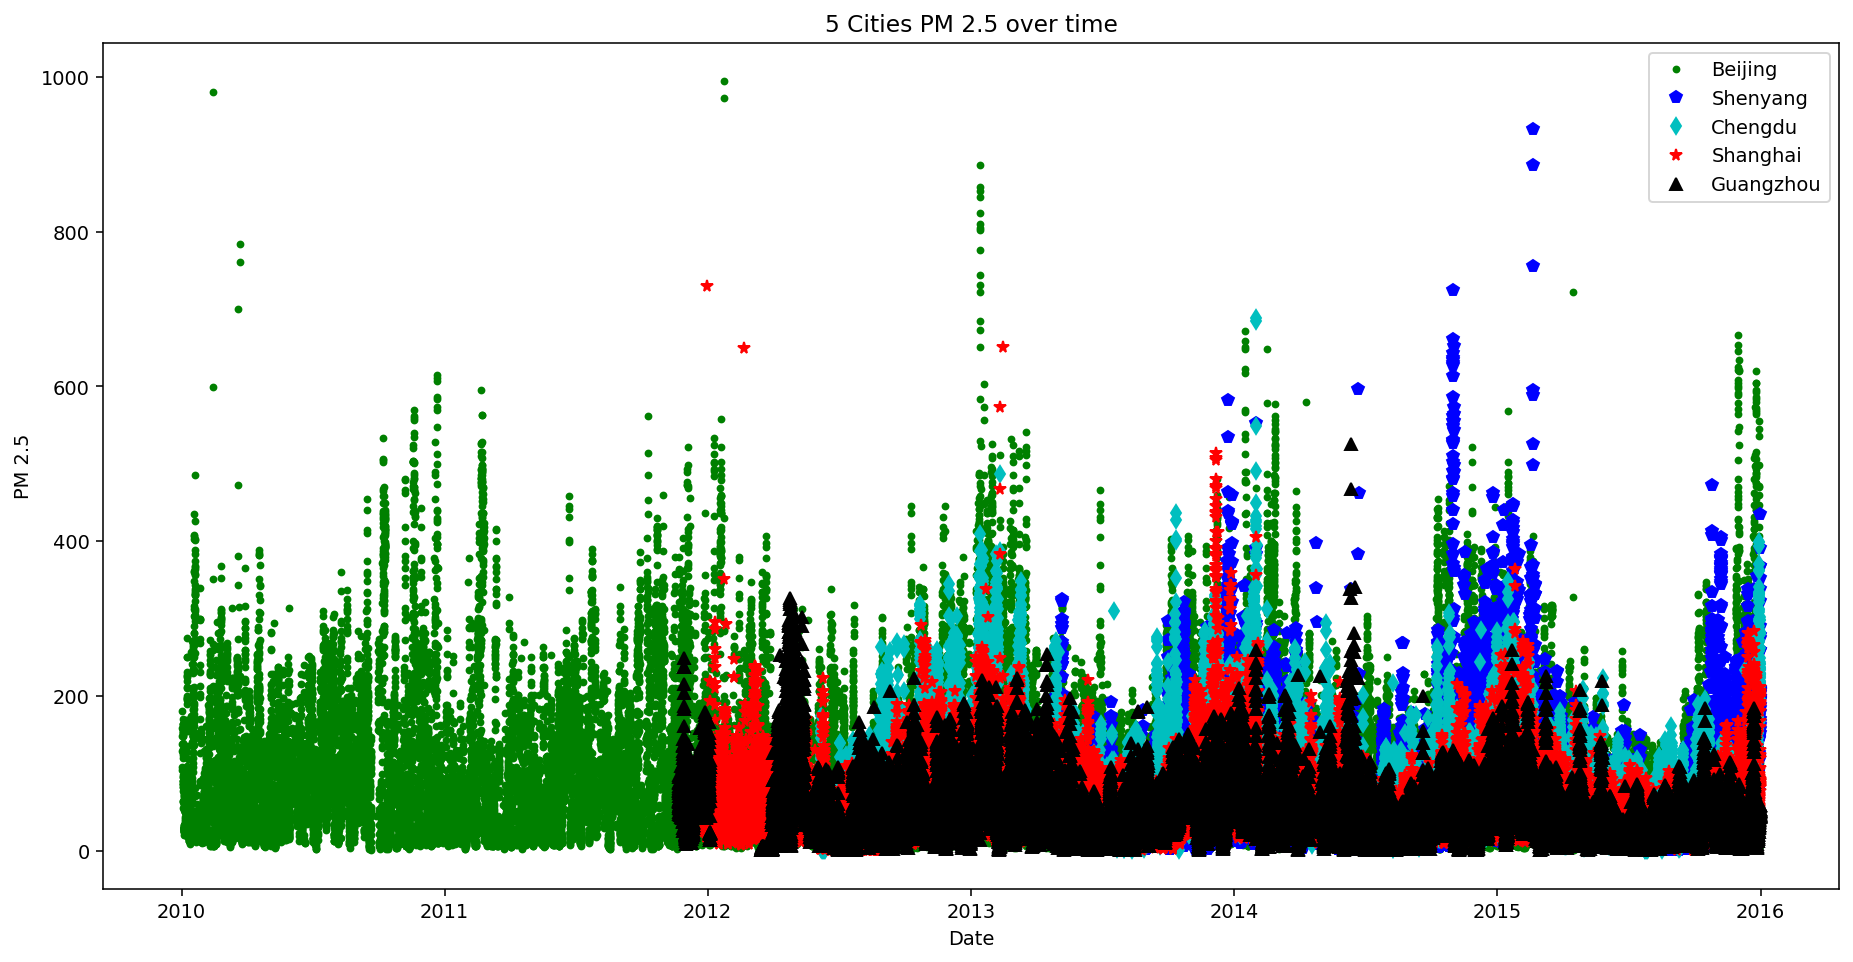

In [45]:
plt.figure(figsize=(16,8),dpi=140)
plt.plot(df_Beijing.index, df_Beijing['PM'],'g.', label='Beijing')
plt.plot(df_Shenyang.index, df_Shenyang['PM'], 'bp', label='Shenyang')
plt.plot(df_Chengdu.index, df_Chengdu['PM'], 'cd', label='Chengdu')
plt.plot(df_Shanghai.index, df_Shanghai['PM'], 'r*', label='Shanghai')
plt.plot(df_Guangzhou.index, df_Guangzhou['PM'], 'k^', label='Guangzhou')
plt.legend(loc='upper right')
plt.title('5 Cities PM 2.5 over time')
plt.xlabel('Date')
plt.ylabel('PM 2.5')
plt.show()

In [46]:
%%markdown
## 1.3 Regression

## 1.3 Regression


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [48]:
data = [df_Beijing, df_Shanghai, df_Guangzhou, df_Chengdu, df_Shenyang]

In [49]:
def split_train_test(df, feature):
    # Treat the column PM as our predictive objective 
    y = df[feature] 
    # All other columns will be used as features when training our model 
    X = df.drop([feature], axis=1) 
    # Split 70% of the data for training and leave out 30% for testing
    return train_test_split(X, y, test_size=0.3, random_state=42)

def model_fit(lr, X_train, y_train):
    lr.fit(X_train, y_train)
    
def pred(lr, X_test):
    y_pred = lr.predict(X_test)
    return y_pred

def score(y_test, y_pred):
    return r2_score(y_test, y_pred)

In [50]:
# 1. Train and evaluate (using r-squared) a linear regression model to predict the PM value. 
#    Repeat this for each city and be sure to evaluate your model using the X_test set.

In [51]:
def run_pred_on_feature(city, feature):
    lr = LinearRegression()
    name = city.head(1)['city'][0]
    city = city.drop(columns=['city'])
    (X_train, X_test, y_train, y_test) = split_train_test(city, feature)
    model_fit(lr, X_train, y_train)
    y_pred = pred(lr, X_test)
    pred_score = score(y_test, y_pred)
    print(name, 'on', feature, 'has score', pred_score )

for city in data:
    run_pred_on_feature(city, 'PM')

Beijing on PM has score 0.2695063871925233
Shanghai on PM has score 0.1718142013741748
Guangzhou on PM has score 0.14467127942864788
Chengdu on PM has score 0.2741246285283506
Shenyang on PM has score 0.21522311748622303


In [52]:
# 2. Use the dataset for one city of your choice for training and evaluate your linear regression 
#    on the dataset of another city. 
#    How do your results compare to when you used data from the same city for both training and testing?

In [53]:
arr_cities = [df_Beijing, df_Shanghai, df_Guangzhou, df_Chengdu, df_Shenyang]

def train_with_a_eval_with_b(a, b):
    lr = LinearRegression()
    a_name = a.head(1)['city'][0]
    a_city = a.drop(columns=['city'])
    b_name = b.head(1)['city'][0]
    b_city = b.drop(columns=['city'])
    A_X_train, A_X_test, A_y_train, A_y_test = split_train_test(a_city, 'PM')
    B_X_train, B_X_test, B_y_train, B_y_test = split_train_test(b_city, 'PM')
    model_fit(lr, A_X_train, A_y_train)
    B_y_pred = pred(lr, B_X_test)
    eval_score = score(B_y_test, B_y_pred)
    print(a_name,'train,', b_name, 'evaluate:', eval_score)
    return eval_score

for city_a in arr_cities:
    for city_b in arr_cities:
        train_with_a_eval_with_b(city_a, city_b)
    print('\r')

Beijing train, Beijing evaluate: 0.2695063871925233
Beijing train, Shanghai evaluate: -1.5097677032177401
Beijing train, Guangzhou evaluate: -6.8692800494617865
Beijing train, Chengdu evaluate: -0.19907310056280636
Beijing train, Shenyang evaluate: -0.34433063218792914

Shanghai train, Beijing evaluate: -0.06800632144921881
Shanghai train, Shanghai evaluate: 0.1718142013741748
Shanghai train, Guangzhou evaluate: -0.5956480499728773
Shanghai train, Chengdu evaluate: -0.08850752930474948
Shanghai train, Shenyang evaluate: 0.0662636797880819

Guangzhou train, Beijing evaluate: -0.040941790583432836
Guangzhou train, Shanghai evaluate: -0.026769701882682906
Guangzhou train, Guangzhou evaluate: 0.14467127942864788
Guangzhou train, Chengdu evaluate: -0.03928664778351387
Guangzhou train, Shenyang evaluate: -0.008952136407051059

Chengdu train, Beijing evaluate: -0.16924008831653747
Chengdu train, Shanghai evaluate: -4.48756493616318
Chengdu train, Guangzhou evaluate: -46.05595370590854
Chengdu

In [54]:
%%markdown
From the all the training and evaluating result above, we could easily see that the model which trained on one city's 
data set, when it is evaluated with other city's data, the score is mostly negative, only except for the two cases, 
'Shanghai train, Shenyang evaluate' and 'Shenyang train and Chengdu evaluate', it means the prediction accuracy is 
not so good as the result when I use data from the same city for both training and testing.

From the all the training and evaluating result above, we could easily see that the model which trained on one city's 
data set, when it is evaluated with other city's data, the score is mostly negative, only except for the two cases, 
'Shanghai train, Shenyang evaluate' and 'Shenyang train and Chengdu evaluate', it means the prediction accuracy is 
not so good as the result when I use data from the same city for both training and testing.


In [55]:
# 3. Using a city of your choice, train and evaluate a linear regression to predict the values of 
#    one of the other columns (not PM). 
#    Is there a particular column that seems to be easier to predict than others? Why do you think that is?

In [56]:
# let's pick up the city 'Shenyang'
for feature in df_Shenyang.columns[5:-1]:
    run_pred_on_feature(df_Shenyang, feature)

Shenyang on PM has score 0.21522311748622303
Shenyang on DEWP has score 0.9875380976854986
Shenyang on HUMI has score 0.9455783721212919
Shenyang on PRES has score 0.6925726526253166
Shenyang on TEMP has score 0.9855543780612581
Shenyang on Iws has score 0.051038994774328494
Shenyang on precipitation has score 0.27784970551943344
Shenyang on Iprec has score 0.2954359683603016


In [57]:
%%markdown
As we could see from the score of the linear regression model on data of Shenyang, we could tell that the 'TEMP' and
'DEWP' both have score of more than 0.98, which means these two features are easier to predict than others.
It does make sense to me, because the temperature usurally stays the similar in the same time period across different
years, although there is global warming, it won't varied so much year to the other. And we see this pattern from the 
plot 'Temperature Over Time' we are drawing above. Furthermore, the humidity has a score of more than 0.94, which means
the humidity is also easier to predict, I think this is because humidity has strong relationship to the temperature.
It also varied from season to season. 

As we could see from the score of the linear regression model on data of Shenyang, we could tell that the 'TEMP' and
'DEWP' both have score of more than 0.98, which means these two features are easier to predict than others.
It does make sense to me, because the temperature usurally stays the similar in the same time period across different
years, although there is global warming, it won't varied so much year to the other. And we see this pattern from the 
plot 'Temperature Over Time' we are drawing above. Furthermore, the humidity has a score of more than 0.94, which means
the humidity is also easier to predict, I think this is because humidity has strong relationship to the temperature.
It also varied from season to season. 


In [58]:
%%markdown 
# Bonus

# Bonus


In [59]:
# Question: If you had to choose one of these cities as your next home, 
#           based on the data you analyzed from these datasets, which one would you choose?

In [60]:
# 1. Boxplot of the PM 2.5 of the 5 cities
df_Beijing = df[df['city'] == 'Beijing']
df_Shanghai = df[df['city'] == 'Shanghai']
df_Guangzhou = df[df['city'] == 'Guangzhou']
df_Chengdu = df[df['city'] == 'Chengdu']
df_Shenyang = df[df['city'] == 'Shenyang']

In [61]:
beijing_pm = df_Beijing.groupby('year').agg(mean)['PM']
shanghai_pm = df_Shanghai.groupby('year').agg(mean)['PM']
guangzhou_pm = df_Guangzhou.groupby('year').agg(mean)['PM']
chengdu_pm = df_Chengdu.groupby('year').agg(mean)['PM']
shenyang_pm = df_Shenyang.groupby('year').agg(mean)['PM']

In [62]:
city_pm = [beijing_pm, shanghai_pm, guangzhou_pm, chengdu_pm, shenyang_pm]

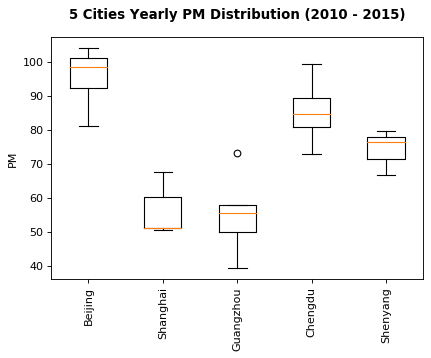

In [63]:
plt.figure(figsize=(6,4),dpi=80)
plt.boxplot(city_pm)
plt.title('5 Cities Yearly PM Distribution (2010 - 2015)',fontsize=12, fontweight='bold', y=1.05)
plt.ylabel('PM')
plt.xticks([1, 2, 3, 4, 5], ['Beijing', 'Shanghai', 'Guangzhou', 'Chengdu', 'Shenyang'], rotation='vertical')
plt.show()

In [64]:
# 2. Boxplot for the temperature of 5 cities
beijing_temp = df_Beijing.groupby(['month']).agg('mean')['TEMP']
shanghai_temp = df_Shanghai.groupby(['month']).agg('mean')['TEMP']
guangzhou_temp = df_Guangzhou.groupby(['month']).agg('mean')['TEMP']
chengdu_temp = df_Chengdu.groupby(['month']).agg('mean')['TEMP']
shenyang_temp = df_Shenyang.groupby(['month']).agg('mean')['TEMP']

In [65]:
city_temp = [beijing_temp, shanghai_temp, guangzhou_temp, chengdu_temp, shenyang_temp]

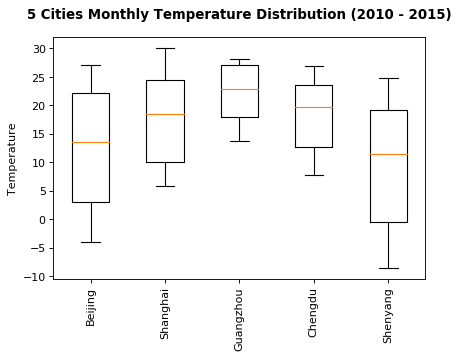

In [66]:
plt.figure(figsize=(6,4),dpi=80)
plt.boxplot(city_temp)
plt.title('5 Cities Monthly Temperature Distribution (2010 - 2015)', fontsize=12, fontweight='bold', y=1.05)
plt.ylabel('Temperature')
plt.xticks([1, 2, 3, 4, 5], ['Beijing', 'Shanghai', 'Guangzhou', 'Chengdu', 'Shenyang'], rotation='vertical')
plt.show()

In [67]:
# 3. Boxplot the wind for 5 cities
beijing_wind = df_Beijing.groupby('year').agg(mean)['Iws']
shanghai_wind = df_Shanghai.groupby('year').agg(mean)['Iws']
guangzhou_wind = df_Guangzhou.groupby('year').agg(mean)['Iws']
chengdu_wind = df_Chengdu.groupby('year').agg(mean)['Iws']
shenyang_wind = df_Shenyang.groupby('year').agg(mean)['Iws']

In [68]:
city_wind = [beijing_wind, shanghai_wind, guangzhou_wind, chengdu_wind, shenyang_wind]

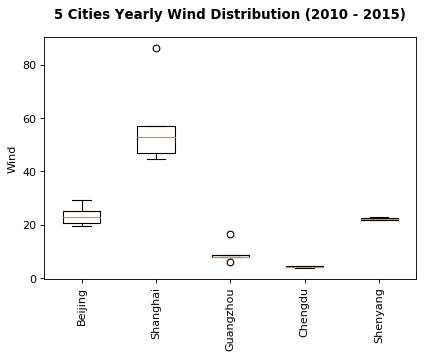

In [69]:
plt.figure(figsize=(6,4),dpi=80)
plt.boxplot(city_wind)
plt.title('5 Cities Yearly Wind Distribution (2010 - 2015)',fontsize=12, fontweight='bold', y=1.05)
plt.ylabel('Wind')
plt.xticks([1, 2, 3, 4, 5], ['Beijing', 'Shanghai', 'Guangzhou', 'Chengdu', 'Shenyang'], rotation='vertical')
plt.show()

In [70]:
# To make more clear of the wind, draw a bar plot for the wind of 5 cities.
city_yearly_wind = pd.concat([beijing_wind, shanghai_wind, guangzhou_wind, chengdu_wind, shenyang_wind], axis=1).fillna(0)
city_yearly_wind.columns = ['Beijing', 'Shanghai', 'Guangzhou', 'Chengdu', 'Shenyang']

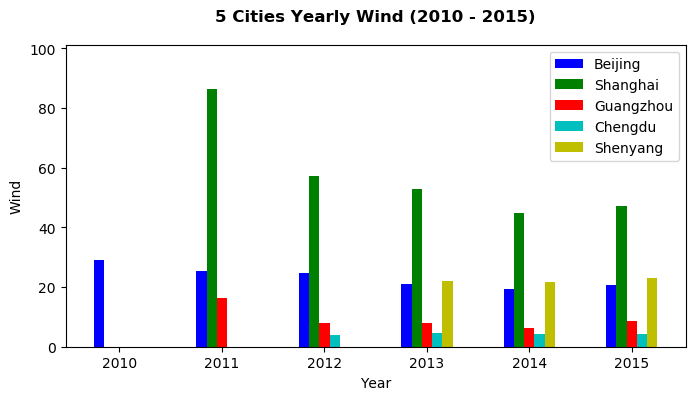

In [71]:
plt.figure(figsize=(8,4),dpi=100)
bins = np.linspace(2010, 2015, 6)
min_y = max(city_yearly_wind.min().min(), 0)
max_y = city_yearly_wind.max().max() + 15
plt.ylim(min_y, max_y)
plt.bar(bins-0.2, city_yearly_wind['Beijing'], width=0.1, color='b', align='center')
plt.bar(bins-0.1, city_yearly_wind['Shanghai'], width=0.1, color='g', align='center')
plt.bar(bins, city_yearly_wind['Guangzhou'], width=0.1, color='r', align='center')
plt.bar(bins+0.1, city_yearly_wind['Chengdu'], width=0.1, color='c', align='center')
plt.bar(bins+0.2, city_yearly_wind['Shenyang'], width=0.1, color='y', align='center')
plt.title('5 Cities Yearly Wind (2010 - 2015)', fontsize=12, fontweight='bold', y=1.05)
plt.legend(city_yearly_wind.columns, loc='upper right')
plt.xlabel('Year')
plt.ylabel('Wind')
plt.show()

In [72]:
# 4. Boxplot of the precipitation of five cities.
beijing_iprec = df_Beijing.groupby('year').agg(mean)['Iprec']
shanghai_iprec = df_Shanghai.groupby('year').agg(mean)['Iprec']
guangzhou_iprec = df_Guangzhou.groupby('year').agg(mean)['Iprec']
chengdu_iprec = df_Chengdu.groupby('year').agg(mean)['Iprec']
shenyang_iprec = df_Shenyang.groupby('year').agg(mean)['Iprec']

In [73]:
city_iprec = [beijing_iprec, shanghai_iprec, guangzhou_iprec, chengdu_iprec, shenyang_iprec]

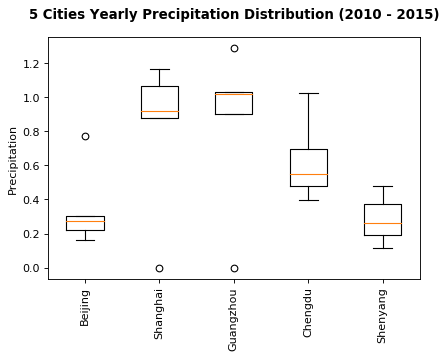

In [74]:
plt.figure(figsize=(6,4),dpi=80)
plt.boxplot(city_iprec)
plt.title('5 Cities Yearly Precipitation Distribution (2010 - 2015)',fontsize=12, fontweight='bold', y=1.05)
plt.ylabel('Precipitation')
plt.xticks([1, 2, 3, 4, 5], ['Beijing', 'Shanghai', 'Guangzhou', 'Chengdu', 'Shenyang'], rotation='vertical')
plt.show()

In [75]:
%%markdown
## conclusion
Personally, I would prefer to live in Guangzhou, here are the reasons.
1. Firstly, my top concern is the air quality, because I love outdoor activities. And Guangzhou has the
lowest level of PM 2.5 among these cities. 
2. Secondly, Guangzhou has a relatively stable temperature, its monthly temperature changing between 15 degree's range, and its mean at around 26 degree, which means it temperature will be comfortable all year long, neither too hot in the summer, nor too cold in the winter. 
3. Thirdly, I don't like wind, I have onced lived in Beijing before, its wind could blow me away. As we could see that, the wind in Guangzhou is relatively weak, which is actually the second weakest among the 5 cities. 
4. Fourth, I like rains, it can help clean the air and make the atmosphere not that dry, because the dry air will 
my nose not so comfortable. 
Therefore, I will pick Guangzhou as my next home.

## conclusion
Personally, I would prefer to live in Guangzhou, here are the reasons.
1. Firstly, my top concern is the air quality, because I love outdoor activities. And Guangzhou has the
lowest level of PM 2.5 among these cities. 
2. Secondly, Guangzhou has a relatively stable temperature, its monthly temperature changing between 15 degree's range, and its mean at around 26 degree, which means it temperature will be comfortable all year long, neither too hot in the summer, nor too cold in the winter. 
3. Thirdly, I don't like wind, I have onced lived in Beijing before, its wind could blow me away. As we could see that, the wind in Guangzhou is relatively weak, which is actually the second weakest among the 5 cities. 
4. Fourth, I like rains, it can help clean the air and make the atmosphere not that dry, because the dry air will 
my nose not so comfortable. 
Therefore, I will pick Guangzhou as my next home.
